#1. PERKENALAN

In [ ]:
'''
Nama      : Rugaya Muksin BSA
Bootcamp  : Data Science 006
Phase     : 0
GC        : 3

Sesuai Guidlines saya diperintahkan untuk mengolah data dari kickstarter projects
yang merupakan salah satu platform pendanaan terbesar di dunia untuk proyek-proyek kreatif.

Dimana data ini sebelum diolah akan diprocess data-nya terlebih dahulu untuk
dihandle missing value-nya menggunakan median.

Data ini akan diolah untuk menampilkan informasi mengenai measure of tendency
dan measure of variance. Data ini juga akan digunakan untuk menyelesaikan sebuah
hipotesis testing.

'''

#2. IMPORT LIBRARY

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#3. DATA LOADING

In [8]:
'''
Meload data kickstarter projects menggunakan pandas

'''

ksp = pd.read_csv ('ks-projects-201801.csv')
ksp

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81838,1416112782,"Reprint of ""Tox, or Everyboy"" eccentric WWI an...",Nonfiction,Publishing,USD,2012-06-24,9450.0,2012-05-25 19:45:00,146.0,failed,5,US,146.0,146.0,9450.00
81839,141611351,Encore - Enhance your concert experience!,Apps,Technology,GBP,2017-12-01,37500.0,2017-11-01 15:13:30,0.0,failed,0,GB,0.0,0.0,50579.98
81840,141612042,Kata Muktu Short Caveman Film,Experimental,Film & Video,USD,2015-05-25,250.0,2015-04-21 23:17:25,275.0,successful,7,US,275.0,275.0,250.00
81841,1416124088,"""Collecting Anchors"" full length album",Punk,Music,USD,2015-05-12,5000.0,2015-04-20 01:33:38,5104.0,successful,125,US,5104.0,5104.0,5000.00


#4. EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
'''
Menampilkan informasi mengenai nama kolom, jumlah kolom dan baris, type data,
missing value, dll.

'''

ksp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81843 entries, 0 to 81842
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                81843 non-null  int64  
 1   name              81843 non-null  object 
 2   category          81843 non-null  object 
 3   main_category     81843 non-null  object 
 4   currency          81843 non-null  object 
 5   deadline          81843 non-null  object 
 6   goal              81843 non-null  float64
 7   launched          81843 non-null  object 
 8   pledged           81843 non-null  float64
 9   state             81843 non-null  object 
 10  backers           81843 non-null  int64  
 11  country           81843 non-null  object 
 12  usd pledged       81039 non-null  float64
 13  usd_pledged_real  81842 non-null  float64
 14  usd_goal_real     81842 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 9.4+ MB


###4.1 Manipulasi kolom

In [10]:
'''
Dari informasi yang didapatkan terdapat missing value di kolom dengan nilai numerik.
Saya mengelompokkan kolom dengan nilai numerik dalam sebuah dataset baru yaitu
ksp_num untuk diatasi missing value-nya.

'''

ksp_num = ksp.select_dtypes(include= np.number)
ksp_num

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,1000.0,0.0,0,0.0,0.0,1533.95
1,1000003930,30000.0,2421.0,15,100.0,2421.0,30000.00
2,1000004038,45000.0,220.0,3,220.0,220.0,45000.00
3,1000007540,5000.0,1.0,1,1.0,1.0,5000.00
4,1000011046,19500.0,1283.0,14,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...
81838,1416112782,9450.0,146.0,5,146.0,146.0,9450.00
81839,141611351,37500.0,0.0,0,0.0,0.0,50579.98
81840,141612042,250.0,275.0,7,275.0,275.0,250.00
81841,1416124088,5000.0,5104.0,125,5104.0,5104.0,5000.00


In [11]:
'''
Menyimpan numerik future di dalam list

'''

columns_num = ksp_num.columns.to_list()

ksp_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81843 entries, 0 to 81842
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                81843 non-null  int64  
 1   goal              81843 non-null  float64
 2   pledged           81843 non-null  float64
 3   backers           81843 non-null  int64  
 4   usd pledged       81039 non-null  float64
 5   usd_pledged_real  81842 non-null  float64
 6   usd_goal_real     81842 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 4.4 MB


###Handling missing value

In [12]:
'''
Cek apakah terdapat missing value di dalam dataset

'''

for col in columns_num:
  total_missing = ksp[col].isnull().sum()
  if total_missing > 0:
    print(col, ' : ', total_missing)

usd pledged  :  804
usd_pledged_real  :  1
usd_goal_real  :  1


In [13]:
'''
cek dataset sebelum handling missing value

'''

ksp.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,8.184300e+04,8.184300e+04,8.184300e+04,81843.000000,8.103900e+04,8.184200e+04,8.184200e+04
mean,1.098748e+09,4.592793e+04,9.715358e+03,105.572071,7.026138e+03,9.097662e+03,4.370372e+04
std,3.483405e+08,1.137943e+06,8.589383e+04,924.774530,6.664749e+04,8.156966e+04,1.223592e+06
min,1.061440e+05,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.900000e-01
25%,1.068786e+09,2.000000e+03,3.100000e+01,2.000000,1.800000e+01,3.100000e+01,2.000000e+03
50%,1.184616e+09,5.100000e+03,6.280000e+02,12.000000,4.000000e+02,6.300000e+02,5.483480e+03
75%,1.300728e+09,1.600000e+04,4.103900e+03,57.000000,3.050000e+03,4.072380e+03,1.535489e+04
max,1.416129e+09,1.000000e+08,8.596475e+06,154926.000000,8.596475e+06,8.596475e+06,1.663614e+08


In [14]:
'''
Mengatasi missing value dengan menggunakan median

'''

ksp['goal'] = ksp['goal'].fillna(ksp['goal'].median())
ksp['pledged'] = ksp['pledged'].fillna(ksp['pledged'].median())
ksp['backers'] = ksp['backers'].fillna(ksp['backers'].median())
ksp['usd pledged'] = ksp['usd pledged'].fillna(ksp['usd pledged'].median())
ksp['usd_pledged_real'] = ksp['usd_pledged_real'].fillna(ksp['usd_pledged_real'].median())
ksp['usd_goal_real'] = ksp['usd_goal_real'].fillna(ksp['usd_goal_real'].median())

ksp.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,8.184300e+04,8.184300e+04,8.184300e+04,81843.000000,8.184300e+04,8.184300e+04,8.184300e+04
mean,1.098748e+09,4.592793e+04,9.715358e+03,105.572071,6.961045e+03,9.097558e+03,4.370325e+04
std,3.483405e+08,1.137943e+06,8.589383e+04,924.774530,6.632254e+04,8.156916e+04,1.223585e+06
min,1.061440e+05,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.900000e-01
25%,1.068786e+09,2.000000e+03,3.100000e+01,2.000000,2.000000e+01,3.100000e+01,2.000000e+03
50%,1.184616e+09,5.100000e+03,6.280000e+02,12.000000,4.000000e+02,6.300000e+02,5.483480e+03
75%,1.300728e+09,1.600000e+04,4.103900e+03,57.000000,3.015000e+03,4.072350e+03,1.535377e+04
max,1.416129e+09,1.000000e+08,8.596475e+06,154926.000000,8.596475e+06,8.596475e+06,1.663614e+08


In [15]:
'''
Cek apakah masih ada missing value di dalam dataset

'''

for col in columns_num:
  total_missing = ksp[col].isnull().sum()
  print(col, ' : ', total_missing)

print('Total Columns : ', len(columns_num))

ID  :  0
goal  :  0
pledged  :  0
backers  :  0
usd pledged  :  0
usd_pledged_real  :  0
usd_goal_real  :  0
Total Columns :  7


#5. MEASURE OF CENTRAL TENDENCY

###5.1 MEAN

In [16]:
ksp.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,8.184300e+04,8.184300e+04,8.184300e+04,81843.000000,8.184300e+04,8.184300e+04,8.184300e+04
mean,1.098748e+09,4.592793e+04,9.715358e+03,105.572071,6.961045e+03,9.097558e+03,4.370325e+04
std,3.483405e+08,1.137943e+06,8.589383e+04,924.774530,6.632254e+04,8.156916e+04,1.223585e+06
min,1.061440e+05,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.900000e-01
25%,1.068786e+09,2.000000e+03,3.100000e+01,2.000000,2.000000e+01,3.100000e+01,2.000000e+03
50%,1.184616e+09,5.100000e+03,6.280000e+02,12.000000,4.000000e+02,6.300000e+02,5.483480e+03
75%,1.300728e+09,1.600000e+04,4.103900e+03,57.000000,3.015000e+03,4.072350e+03,1.535377e+04
max,1.416129e+09,1.000000e+08,8.596475e+06,154926.000000,8.596475e+06,8.596475e+06,1.663614e+08


In [17]:
print(ksp['backers'].describe())
ksp['backers'].describe()['mean']

count     81843.000000
mean        105.572071
std         924.774530
min           0.000000
25%           2.000000
50%          12.000000
75%          57.000000
max      154926.000000
Name: backers, dtype: float64


105.57207091626651

###5.2 MEDIAN

In [18]:
ksp['backers'].median()

12.0

###5.3 MODE

In [19]:
ksp['backers'].mode()

0    0
dtype: int64

#6. MEASURE OF VARIANCE

###6.1 RANGE

In [20]:
num_columns = ksp.describe().columns
print(ksp[num_columns].max()-ksp[num_columns].min())

ID                  1.416023e+09
goal                1.000000e+08
pledged             8.596475e+06
backers             1.549260e+05
usd pledged         8.596475e+06
usd_pledged_real    8.596475e+06
usd_goal_real       1.663614e+08
dtype: float64


###6.2 VARIANCE

In [21]:
print("Numeric columns Variance")
print(ksp.var())
print("")

Numeric columns Variance
ID                  1.213411e+17
goal                1.294914e+12
pledged             7.377751e+09
backers             8.552079e+05
usd pledged         4.398679e+09
usd_pledged_real    6.653528e+09
usd_goal_real       1.497160e+12
dtype: float64



###6.3 STANDARD DEVIATION

In [22]:
print("Numeric columns Standard Deviation")
print(ksp.std())
print("")

Numeric columns Standard Deviation
ID                  3.483405e+08
goal                1.137943e+06
pledged             8.589383e+04
backers             9.247745e+02
usd pledged         6.632254e+04
usd_pledged_real    8.156916e+04
usd_goal_real       1.223585e+06
dtype: float64



#7. HYPOTESYS TESTING

Saya punya kecurigaan bahwa setiap **category** memiliki besar pendanaan dan sponsor yang berbeda. Khususnya Music dan Documentary.





$$ H_0: \mu_{Music} = \mu_{Documentary} $$
$$ H_1: \mu_{Music} \neq \mu_{Documentary} $$

In [23]:
backers_music = ksp[ksp['category']=='Music'][['backers', 'usd_goal_real']].groupby('backers').sum()
backers_documentary = ksp[ksp['category']=='Documentary'][['backers', 'usd_goal_real']].groupby('backers').sum()

print('Average of Music Category: ${}'.format(np.round(backers_music.usd_goal_real.mean())))
print('Average of Documentary Category: ${}'.format(np.round(backers_documentary.usd_goal_real.mean())))

Average of Music Category: $328037.0
Average of Documentary Category: $480827.0


In [24]:
t_stat, p_val = stats.ttest_ind(backers_music,backers_documentary)
print('P-value:',p_val[0]) 
print('t-statistics:',t_stat[0])

P-value: 0.6761765882313173
t-statistics: -0.41784486259777104


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


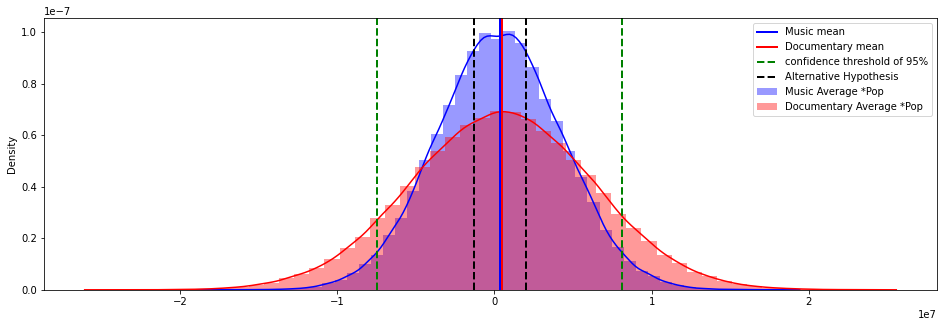

In [34]:
music_pop = np.random.normal(backers_music.usd_goal_real.mean(),backers_music.usd_goal_real.std(),80000)
documentary_pop = np.random.normal(backers_documentary.usd_goal_real.mean(),backers_documentary.usd_goal_real.std(),80000)

ci = stats.norm.interval(0.95, backers_music.usd_goal_real.mean(), backers_music.usd_goal_real.std())
plt.figure(figsize=(16,5))
sns.distplot(music_pop, label='Music Average *Pop',color='blue')
sns.distplot(documentary_pop, label='Documentary Average *Pop',color='red')

plt.axvline(backers_music.usd_goal_real.mean(), color='blue', linewidth=2, label='Music mean')
plt.axvline(backers_documentary.usd_goal_real.mean(), color='red',  linewidth=2, label='Documentary mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(music_pop.mean()+t_stat[0]*music_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(music_pop.mean()-t_stat[0]*music_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Berdasarkan hasil di atas, dapat disimpulkan bahwa diterima hipotesis nol. Antara category Music dan Documentary tidak berbeda secara signifikan dalam hal pendanaan dan sponsor.

#7. HASIL DAN KESIMPULAN

7.1 Hasil Measure of Tendency

*   MOT mean : 103.73306936500953
*   MOT median : 12.0
*   MOT mode : 0.0

7.2 Hasil dari Measure of Variance

In [ ]:
'''
MOV range : 
ID                  1.172929e+09
goal                1.000000e+08
pledged             8.596475e+06
backers             8.558100e+04
usd pledged         8.596475e+06
usd_pledged_real    8.596475e+06
usd_goal_real       1.000000e+08

MOV variance : 
ID                  8.929211e+16
goal                7.964178e+11
pledged             9.270577e+09
backers             7.531087e+05
usd pledged         6.335930e+09
usd_pledged_real    8.784973e+09
usd_goal_real       6.939648e+11

MOV standar deviasi:
ID                  2.988178e+08
goal                8.924224e+05
pledged             9.628384e+04
backers             8.678184e+02
usd pledged         7.959856e+04
usd_pledged_real    9.372819e+04
usd_goal_real       8.330455e+05

'''

7.3 Hasil Hipotesis Testing

$$TERIMA -> H0 $$


**P-value: 0.6761765882313173**

Critical value: 0.05



Terima H0 karena p-value > 0.05


Nilai p-value lebih besar dari critical value sehingga peluang untuk menerima H0 sangat besar. Dengan demikian kecurigaan saya bahwa setiap category khususnya category Music dan Documentary memiliki besar pendanaan dan sponsor yang berbeda DITOLAK. 
